In [37]:
import numpy as np
import pandas as pd
import seaborn as sns

# Diary Response Analysis

In [38]:
responses_df = pd.read_csv('data/diary_responses.csv')
responses_df.columns = ['start_date', 'end_date', 'status', 'progress', 'duration', 'finished', 'recorded_date', 'response_id', 'dist_channel',
                        'user_lang', 'participant_id', 'q3_location', 'q4_environment', 'q5_time_of_day', 'q6_time_taken', 'q7_assignment_count', 
                        'q8_rushed_1', 'q8_rushed_2', 'q8_rushed_3', 'q8_rushed_4', 'q8_rushed_5', 'q9_comments']
responses_df.drop(columns=['status', 'progress', 'finished', 'response_id', 'dist_channel', 'user_lang'], inplace=True)
responses_df = responses_df.iloc[2:].reset_index(drop=True)
responses_df.head()

,start_date,end_date,duration,recorded_date,participant_id,q3_location,q4_environment,q5_time_of_day,q6_time_taken,q7_assignment_count,q8_rushed_1,q8_rushed_2,q8_rushed_3,q8_rushed_4,q8_rushed_5,q9_comments
0,2024-02-26 23:20:19,2024-02-26 23:22:01,102,2024-02-26 23:22:02,10,Postgraduate office,sitting in silence,Afternoon,1.5,4,NaN,NaN,How rushed did you feel when grading?,NaN,NaN,None currently
1,2024-02-27 00:51:44,2024-02-27 00:52:56,72,2024-02-27 00:52:57,24,at home,listening to music,Night,2.5,1,How rushed did you feel when grading?,NaN,NaN,NaN,NaN,No
2,2024-02-27 12:19:45,2024-02-27 12:21:57,131,2024-02-27 12:21:57,16,I did grading at home,Listening to music,Morning,1,2,How rushed did you feel when grading?,NaN,NaN,NaN,NaN,Software can be laggy some time.
3,2024-02-27 22:13:28,2024-02-27 22:18:04,276,2024-02-27 22:18:04,10,home,sitting in silence,Afternoon,3,5,NaN,How rushed did you feel when grading?,How rushed did you feel when grading?,NaN,NaN,One suggestion for future java coursework simi...
4,2024-02-27 19:43:25,2024-02-27 23:18:59,12934,2024-02-27 23:18:59,6,Home on desk,Listening to podcasts,Night,4,5,NaN,NaN,NaN,How rushed did you feel when grading?,NaN,"By default, there isn't a way to give a 100 fo..."


### Merge Q8 to one column

In [39]:
rushed_df = responses_df[['q8_rushed_1', 'q8_rushed_2', 'q8_rushed_3', 'q8_rushed_4', 'q8_rushed_5']].notnull().astype(int)
rushed_df['check'] = rushed_df.sum(axis=1)
rushed_df['q8_rushed_2'] = rushed_df['q8_rushed_2'].replace(1, 2)
rushed_df['q8_rushed_3'] = rushed_df['q8_rushed_3'].replace(1, 3)
rushed_df['q8_rushed_4'] = rushed_df['q8_rushed_4'].replace(1, 4)
rushed_df['q8_rushed_5'] = rushed_df['q8_rushed_5'].replace(1, 5)
rushed_df = rushed_df.replace(0, np.nan)
rushed_col = rushed_df[['q8_rushed_1', 'q8_rushed_2', 'q8_rushed_3', 'q8_rushed_4', 'q8_rushed_5']].median(axis=1)
rushed_col

0      3.0
1      1.0
2      1.0
3      2.5
4      4.0
      ... 
169    2.5
170    3.0
171    4.0
172    3.0
173    2.0
Length: 174, dtype: float64

In [40]:
responses_df['q8_rushed'] = rushed_col
responses_df.drop(columns=['q8_rushed_1', 'q8_rushed_2', 'q8_rushed_3', 'q8_rushed_4', 'q8_rushed_5'], inplace=True)
responses_df

,start_date,end_date,duration,recorded_date,participant_id,q3_location,q4_environment,q5_time_of_day,q6_time_taken,q7_assignment_count,q9_comments,q8_rushed
0,2024-02-26 23:20:19,2024-02-26 23:22:01,102,2024-02-26 23:22:02,10,Postgraduate office,sitting in silence,Afternoon,1.5,4,None currently,3.0
1,2024-02-27 00:51:44,2024-02-27 00:52:56,72,2024-02-27 00:52:57,24,at home,listening to music,Night,2.5,1,No,1.0
2,2024-02-27 12:19:45,2024-02-27 12:21:57,131,2024-02-27 12:21:57,16,I did grading at home,Listening to music,Morning,1,2,Software can be laggy some time.,1.0
3,2024-02-27 22:13:28,2024-02-27 22:18:04,276,2024-02-27 22:18:04,10,home,sitting in silence,Afternoon,3,5,One suggestion for future java coursework simi...,2.5
4,2024-02-27 19:43:25,2024-02-27 23:18:59,12934,2024-02-27 23:18:59,6,Home on desk,Listening to podcasts,Night,4,5,"By default, there isn't a way to give a 100 fo...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169,2024-04-11 18:21:56,2024-04-11 18:22:18,22,2024-04-11 18:22:19,22,Home,Silenece,Evening,0.5,2,NaN,2.5
170,2024-04-11 21:24:47,2024-04-11 21:25:34,47,2024-04-11 21:25:35,18,In my room at home,Listening to lo-fi music,Morning,1.5,6,It started to feel natural to mark the assignm...,3.0
171,2024-04-11 21:25:38,2024-04-11 21:26:52,74,2024-04-11 21:26:53,18,In a cinema room at my uni accommodation,"Watching TV, but not in a loud environment",Evening,0.75,3,"Because I was in a cinema room, it felt a bit ...",4.0
172,2024-04-12 10:31:55,2024-04-12 10:33:09,73,2024-04-12 10:33:09,18,At home in front of my computer,Listening to lo-fi music in a cosy environment,Morning,0.75,3,"This was the last batch I marked, and I tried ...",3.0


In [41]:
grey = (187/255, 187/255, 187/255)
darkgreen = (51/255, 117/255, 56/255)
teal = (93/255, 168/255, 153/255)
blue = (148/255, 203/255, 236/255)
yellow = (220/255, 205/255, 125/255)

# Plots
### Diary entries per participant

In [42]:
number_entries_df = responses_df[['participant_id', 'start_date']].groupby('participant_id').count().reset_index().astype(int).rename(columns={'start_date': 'count'})
number_entries_df

,participant_id,count
0,1,3
1,10,7
2,11,14
3,12,6
4,13,4
5,14,5
6,15,6
7,16,7
8,17,4
9,18,10


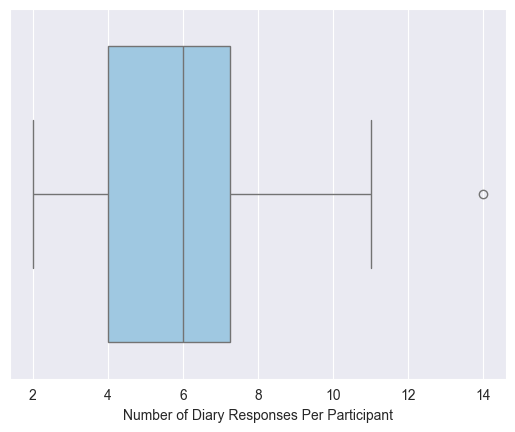

In [43]:
entries_plt = sns.boxplot(number_entries_df, x='count', color=blue)
entries_plt.set(xlabel='Number of Diary Responses Per Participant')
entries_plt.get_figure().savefig('plots/diary_responses.pdf', bbox_inches='tight')

### Average time taken

In [44]:
time_taken_df = responses_df[['q6_time_taken']].astype(float).reset_index()
# One outlier of 54 hours graded, participant only gave one diary entry per batch (removed from analysis)
time_taken_df = time_taken_df[time_taken_df['q6_time_taken'] < 20]
time_taken_df

,index,q6_time_taken
0,0,1.50
1,1,2.50
2,2,1.00
3,3,3.00
4,4,4.00
...,...,...
169,169,0.50
170,170,1.50
171,171,0.75
172,172,0.75


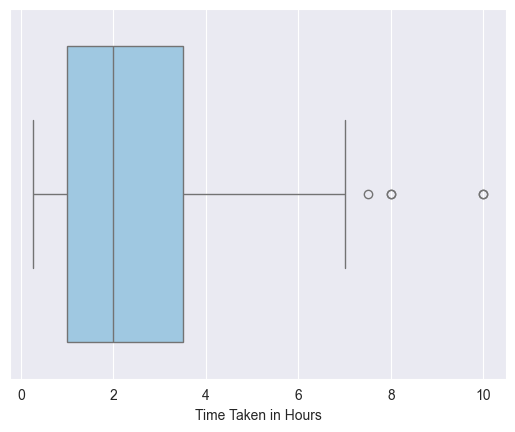

In [45]:
time_taken_plt = sns.boxplot(time_taken_df, x='q6_time_taken', color=blue)
time_taken_plt.set(xlabel='Time Taken in Hours')
time_taken_plt.get_figure().savefig('plots/time_taken.pdf', bbox_inches='tight')

### Time taken vs number of assignments

In [46]:
time_taken_no_assignments_df = responses_df[['q6_time_taken', 'q7_assignment_count']].astype(float)
# One outlier of 54 hours graded, participant only gave one diary entry per batch (removed from analysis)
time_taken_no_assignments_df = time_taken_no_assignments_df[time_taken_no_assignments_df['q6_time_taken'] < 20]
time_taken_no_assignments_df

,q6_time_taken,q7_assignment_count
0,1.50,4.0
1,2.50,1.0
2,1.00,2.0
3,3.00,5.0
4,4.00,5.0
...,...,...
169,0.50,2.0
170,1.50,6.0
171,0.75,3.0
172,0.75,3.0


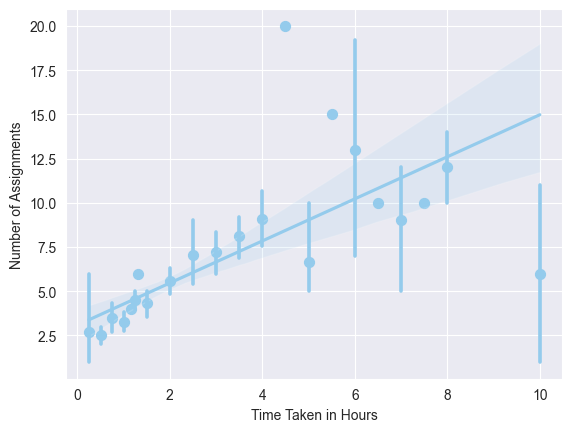

In [47]:
assignment_count_time_taken_plt = sns.regplot(time_taken_no_assignments_df, x='q6_time_taken', y='q7_assignment_count', x_estimator=np.mean, color=blue)
assignment_count_time_taken_plt.set(xlabel='Time Taken in Hours', ylabel='Number of Assignments')
assignment_count_time_taken_plt.get_figure().savefig('plots/time_taken_no_assignments.pdf', bbox_inches='tight')

### Rushed

In [48]:
rushed_df = responses_df[['start_date', 'q8_rushed']].groupby('q8_rushed').count().reset_index().rename(columns={'start_date': 'count'})
rushed_df

,q8_rushed,count
0,1.0,61
1,2.0,34
2,2.5,5
3,3.0,47
4,3.5,5
5,4.0,21
6,5.0,1


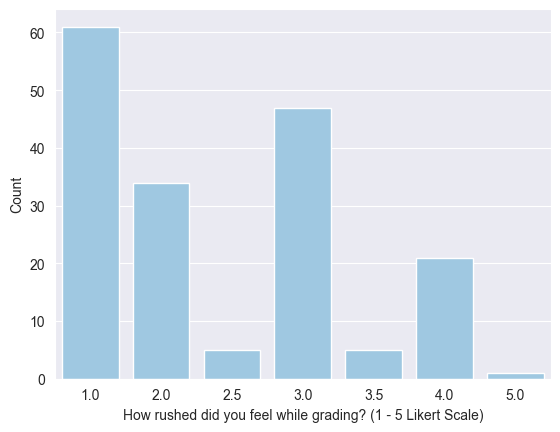

In [49]:
rushed_plt = sns.barplot(rushed_df, x='q8_rushed', y='count', color=blue)
rushed_plt.set(xlabel='How rushed did you feel while grading? (1 - 5 Likert Scale)', ylabel='Count')
rushed_plt.get_figure().savefig('plots/rushed_count.pdf', bbox_inches='tight')

In [50]:
rushed_assignment_count_df = responses_df[['q8_rushed', 'q7_assignment_count']].astype(float)
rushed_assignment_count_df

,q8_rushed,q7_assignment_count
0,3.0,4.0
1,1.0,1.0
2,1.0,2.0
3,2.5,5.0
4,4.0,5.0
...,...,...
169,2.5,2.0
170,3.0,6.0
171,4.0,3.0
172,3.0,3.0


### Time of Day

In [51]:
time_of_day_df = responses_df[['q5_time_of_day', 'start_date']].groupby('q5_time_of_day').count().reset_index().rename(columns={'start_date': 'count'})
time_of_day_df

,q5_time_of_day,count
0,Afternoon,59
1,Evening,46
2,Morning,35
3,Night,34


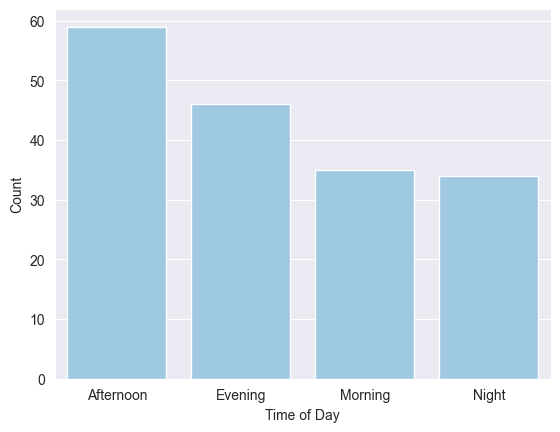

In [52]:
time_of_day_plt = sns.barplot(time_of_day_df, x='q5_time_of_day', y='count', color=blue)
time_of_day_plt.set(xlabel='Time of Day', ylabel='Count')
time_of_day_plt.get_figure().savefig('plots/time_of_day_.pdf', bbox_inches='tight')

### Location

In [53]:
def process_location(response):
    if 'home' in response or 'bedroom' in response or 'my' in response or 'student apartment' in response or 'living room' in response or 'in bed' in response:
        return 'home'
    if 'pgr' in response or 'office' in response or 'phd' in response or 'study desk' in response or 'university' in response or 'campus' in response or 'computer labs' in response:
        return 'campus'
    if 'library' in response:
        return 'library'
    if 'hotel' in response:
        return 'hotel'
    
    return response

In [54]:
location_df = responses_df[['q3_location', 'start_date']]
location_df['q3_location'] = location_df['q3_location'].str.lower()
location_df['q3_location'] = location_df['q3_location'].apply(process_location)
location_df

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_42459/2856126624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['q3_location'] = location_df['q3_location'].str.lower()
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_42459/2856126624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['q3_location'] = location_df['q3_location'].apply(process_location)


,q3_location,start_date
0,campus,2024-02-26 23:20:19
1,home,2024-02-27 00:51:44
2,home,2024-02-27 12:19:45
3,home,2024-02-27 22:13:28
4,home,2024-02-27 19:43:25
...,...,...
169,home,2024-04-11 18:21:56
170,home,2024-04-11 21:24:47
171,home,2024-04-11 21:25:38
172,home,2024-04-12 10:31:55


In [55]:
location_df['q3_location'].value_counts()

q3_location
home                                               137
campus                                              19
library                                              6
desk                                                 2
hotel                                                2
a few days before the deadline after a busy day      1
the first thing in the morning on a free day         1
quiet room                                           1
during the day on a free day                         1
at uni and at work                                   1
alone in a room                                      1
room                                                 1
in a cafe                                            1
Name: count, dtype: int64

In [56]:
location_df = location_df.groupby('q3_location').count().reset_index().rename(columns={'start_date': 'count'})
location_df

,q3_location,count
0,a few days before the deadline after a busy day,1
1,alone in a room,1
2,at uni and at work,1
3,campus,19
4,desk,2
5,during the day on a free day,1
6,home,137
7,hotel,2
8,in a cafe,1
9,library,6


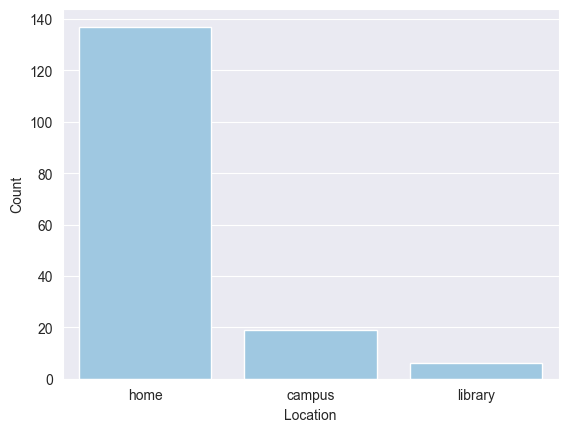

In [57]:
location_plt = sns.barplot(location_df[location_df['count'] > 2].sort_values(by='count', ascending=False), x='q3_location', y='count', color=blue)
location_plt.set(xlabel='Location', ylabel='Count')
location_plt.get_figure().savefig('plots/location_counts.png', bbox_inches='tight')

### Environment

In [58]:
def process_env(response):
    if 'music' in response:
        return 'music'
    if ('silence' in response or 'quiet' in response or 'silent' in response or 'silenece' in response or
            response == 'no distractions' or response =='listening to lo-fi hiphop'):
        return 'silence'
    if 'tv' in response or 'watching' in response:
        return 'TV'
    if 'podcast' in response:
        return 'podcast'
    if 'busy' in response:
        return 'busy environment'
    
    return response

In [59]:
env_df = responses_df[['q4_environment', 'start_date']]
env_df['q4_environment'] = env_df['q4_environment'].str.lower()
env_df['q4_environment'] = env_df['q4_environment'].apply(process_env)
env_df

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_42459/1052366437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_df['q4_environment'] = env_df['q4_environment'].str.lower()
/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_42459/1052366437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_df['q4_environment'] = env_df['q4_environment'].apply(process_env)


,q4_environment,start_date
0,silence,2024-02-26 23:20:19
1,music,2024-02-27 00:51:44
2,music,2024-02-27 12:19:45
3,silence,2024-02-27 22:13:28
4,podcast,2024-02-27 19:43:25
...,...,...
169,silence,2024-04-11 18:21:56
170,music,2024-04-11 21:24:47
171,TV,2024-04-11 21:25:38
172,music,2024-04-12 10:31:55


In [60]:
env_df['q4_environment'].value_counts()

q4_environment
silence                                                     85
music                                                       65
TV                                                          12
podcast                                                      6
busy environment                                             3
sitting at my work desk                                      1
in a study space                                             1
some people were also in the room doing their own things     1
Name: count, dtype: int64

In [61]:
env_df = env_df.groupby('q4_environment').count().reset_index().rename(columns={'start_date': 'count'})
env_df

,q4_environment,count
0,TV,12
1,busy environment,3
2,in a study space,1
3,music,65
4,podcast,6
5,silence,85
6,sitting at my work desk,1
7,some people were also in the room doing their ...,1


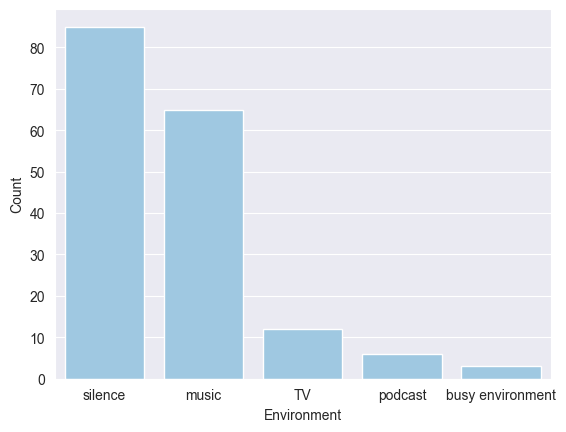

In [62]:
env_plt = sns.barplot(env_df[env_df['count'] > 2].sort_values(by='count', ascending=False), x='q4_environment', y='count', color=blue)
env_plt.set(xlabel='Environment', ylabel='Count')
env_plt.get_figure().savefig('plots/environment.pdf', bbox_inches='tight')

### Comments

In [63]:
responses_df['q9_comments'].dropna().unique()

array(['None currently', 'No', 'Software can be laggy some time.',
       'One suggestion for future java coursework similar to this one: In the coursework spec for students, specify where to put the main class. It will be much easier for examiners to compile their submission package and run the code. ',
       "By default, there isn't a way to give a 100 for any sections",
       'The time estimate of 15 mins per assignment is very ambitious if we want to ensure thorough grading, especially when dealing with aspects like elegance. ',
       'Much more efficient if I could comment as I go through the code for any criteria instead of one at a time.',
       'No issues',
       'None specifically other than the already highlighted one where it takes much longer on an assignment than assumed to grade properly.',
       'Went back to run the projects in BlueJ and ended up docking marks for 4 of them on account of not compiling.',
       'Out of 10 assignments, 7 of them are regraded accord